In [3]:
import csv
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
from pyproj import Proj
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
def calculate_distance_geopy(coord1, coord2):
    distance_miles = geodesic(coord1, coord2).miles
    distance_km = geodesic(coord1, coord2).kilometers
    return distance_miles, distance_km

In [5]:
def calculate_distance_projection(coord1, coord2, projection):
    lon1, lat1 = coord1
    lon2, lat2 = coord2
    x1, y1 = projection(lon1, lat1)
    x2, y2 = projection(lon2, lat2)
    distance_meters = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    distance_km = distance_meters / 1000
    distance_miles = distance_km / 1.60934
    return distance_miles, distance_km

In [6]:
def get_coordinates_from_nominatim(postal_code):
    geolocator = Nominatim(user_agent="your_app_name")
    location = geolocator.geocode(postal_code)
    if location:
        return location.longitude, location.latitude
    else:
        print(f"Coordinates not found for postal code: {postal_code}")
        return None

In [7]:
csv_file_1 = r"C:\Users\Colin\Desktop\blog\zip_code_distance\GPC-POST-GEO-NORM-GB_CSV\GPC-POSTCODES-GEO-NORM-GB.csv"
csv_file_2 = r"C:\Users\Colin\Desktop\blog\zip_code_distance\GPC-POST-GEO-NORM-MX_CSV\GPC-POSTCODES-GEO-NORM-MX.csv"

In [8]:
coordinates_dict = {}

In [9]:
with open(csv_file_1, 'r', encoding='utf-8') as file_1:
    reader_1 = csv.DictReader(file_1, delimiter=';')
    for row_1 in reader_1:
        zip_code_1 = row_1['postcode']
        latitude_1 = float(row_1['latitude'])
        longitude_1 = float(row_1['longitude'])
        coordinates_dict[zip_code_1] = (longitude_1, latitude_1)

In [10]:
with open(csv_file_2, 'r', encoding='utf-8') as file_2:
    reader_2 = csv.DictReader(file_2, delimiter=';')
    for row_2 in reader_2:
        zip_code_2 = row_2['postcode']
        latitude_2 = float(row_2['latitude'])
        longitude_2 = float(row_2['longitude'])
        coordinates_dict[zip_code_2] = (longitude_2, latitude_2)

In [11]:
zip_code1 = 'NE1 1AD'
zip_code2 = 'TR1 1UH'

In [12]:
coord1 = coordinates_dict.get(zip_code1)
coord2 = coordinates_dict.get(zip_code2)

In [13]:
if coord1 is None:
    if zip_code1 in coordinates_dict:
        coord1 = coordinates_dict[zip_code1]
    else:
        coord1 = get_coordinates_from_nominatim(zip_code1)
        if coord1:
            coordinates_dict[zip_code1] = coord1

In [14]:
if coord2 is None:
    if zip_code2 in coordinates_dict:
        coord2 = coordinates_dict[zip_code2]
    else:
        coord2 = get_coordinates_from_nominatim(zip_code2)
        if coord2:
            coordinates_dict[zip_code2] = coord2

In [15]:
def plot_map(ax, coord1, coord2, zip_code1, zip_code2, distances):
    ax.add_feature(cfeature.COASTLINE, edgecolor='#01295F', linewidth=0.75)
    ax.plot([coord1[0], coord2[0]], [coord1[1], coord2[1]], 'k-', linewidth=0.75)
    point1 = ax.plot(coord1[0], coord1[1], 'o', color='#e63946', markersize=3, label=f'{zip_code1}')
    point2 = ax.plot(coord2[0], coord2[1], 'o', color='#00a77d', markersize=3, label=f'{zip_code2}')
    ax.set_title(f'Distance between {zip_code1} and {zip_code2}')
    return point1, point2

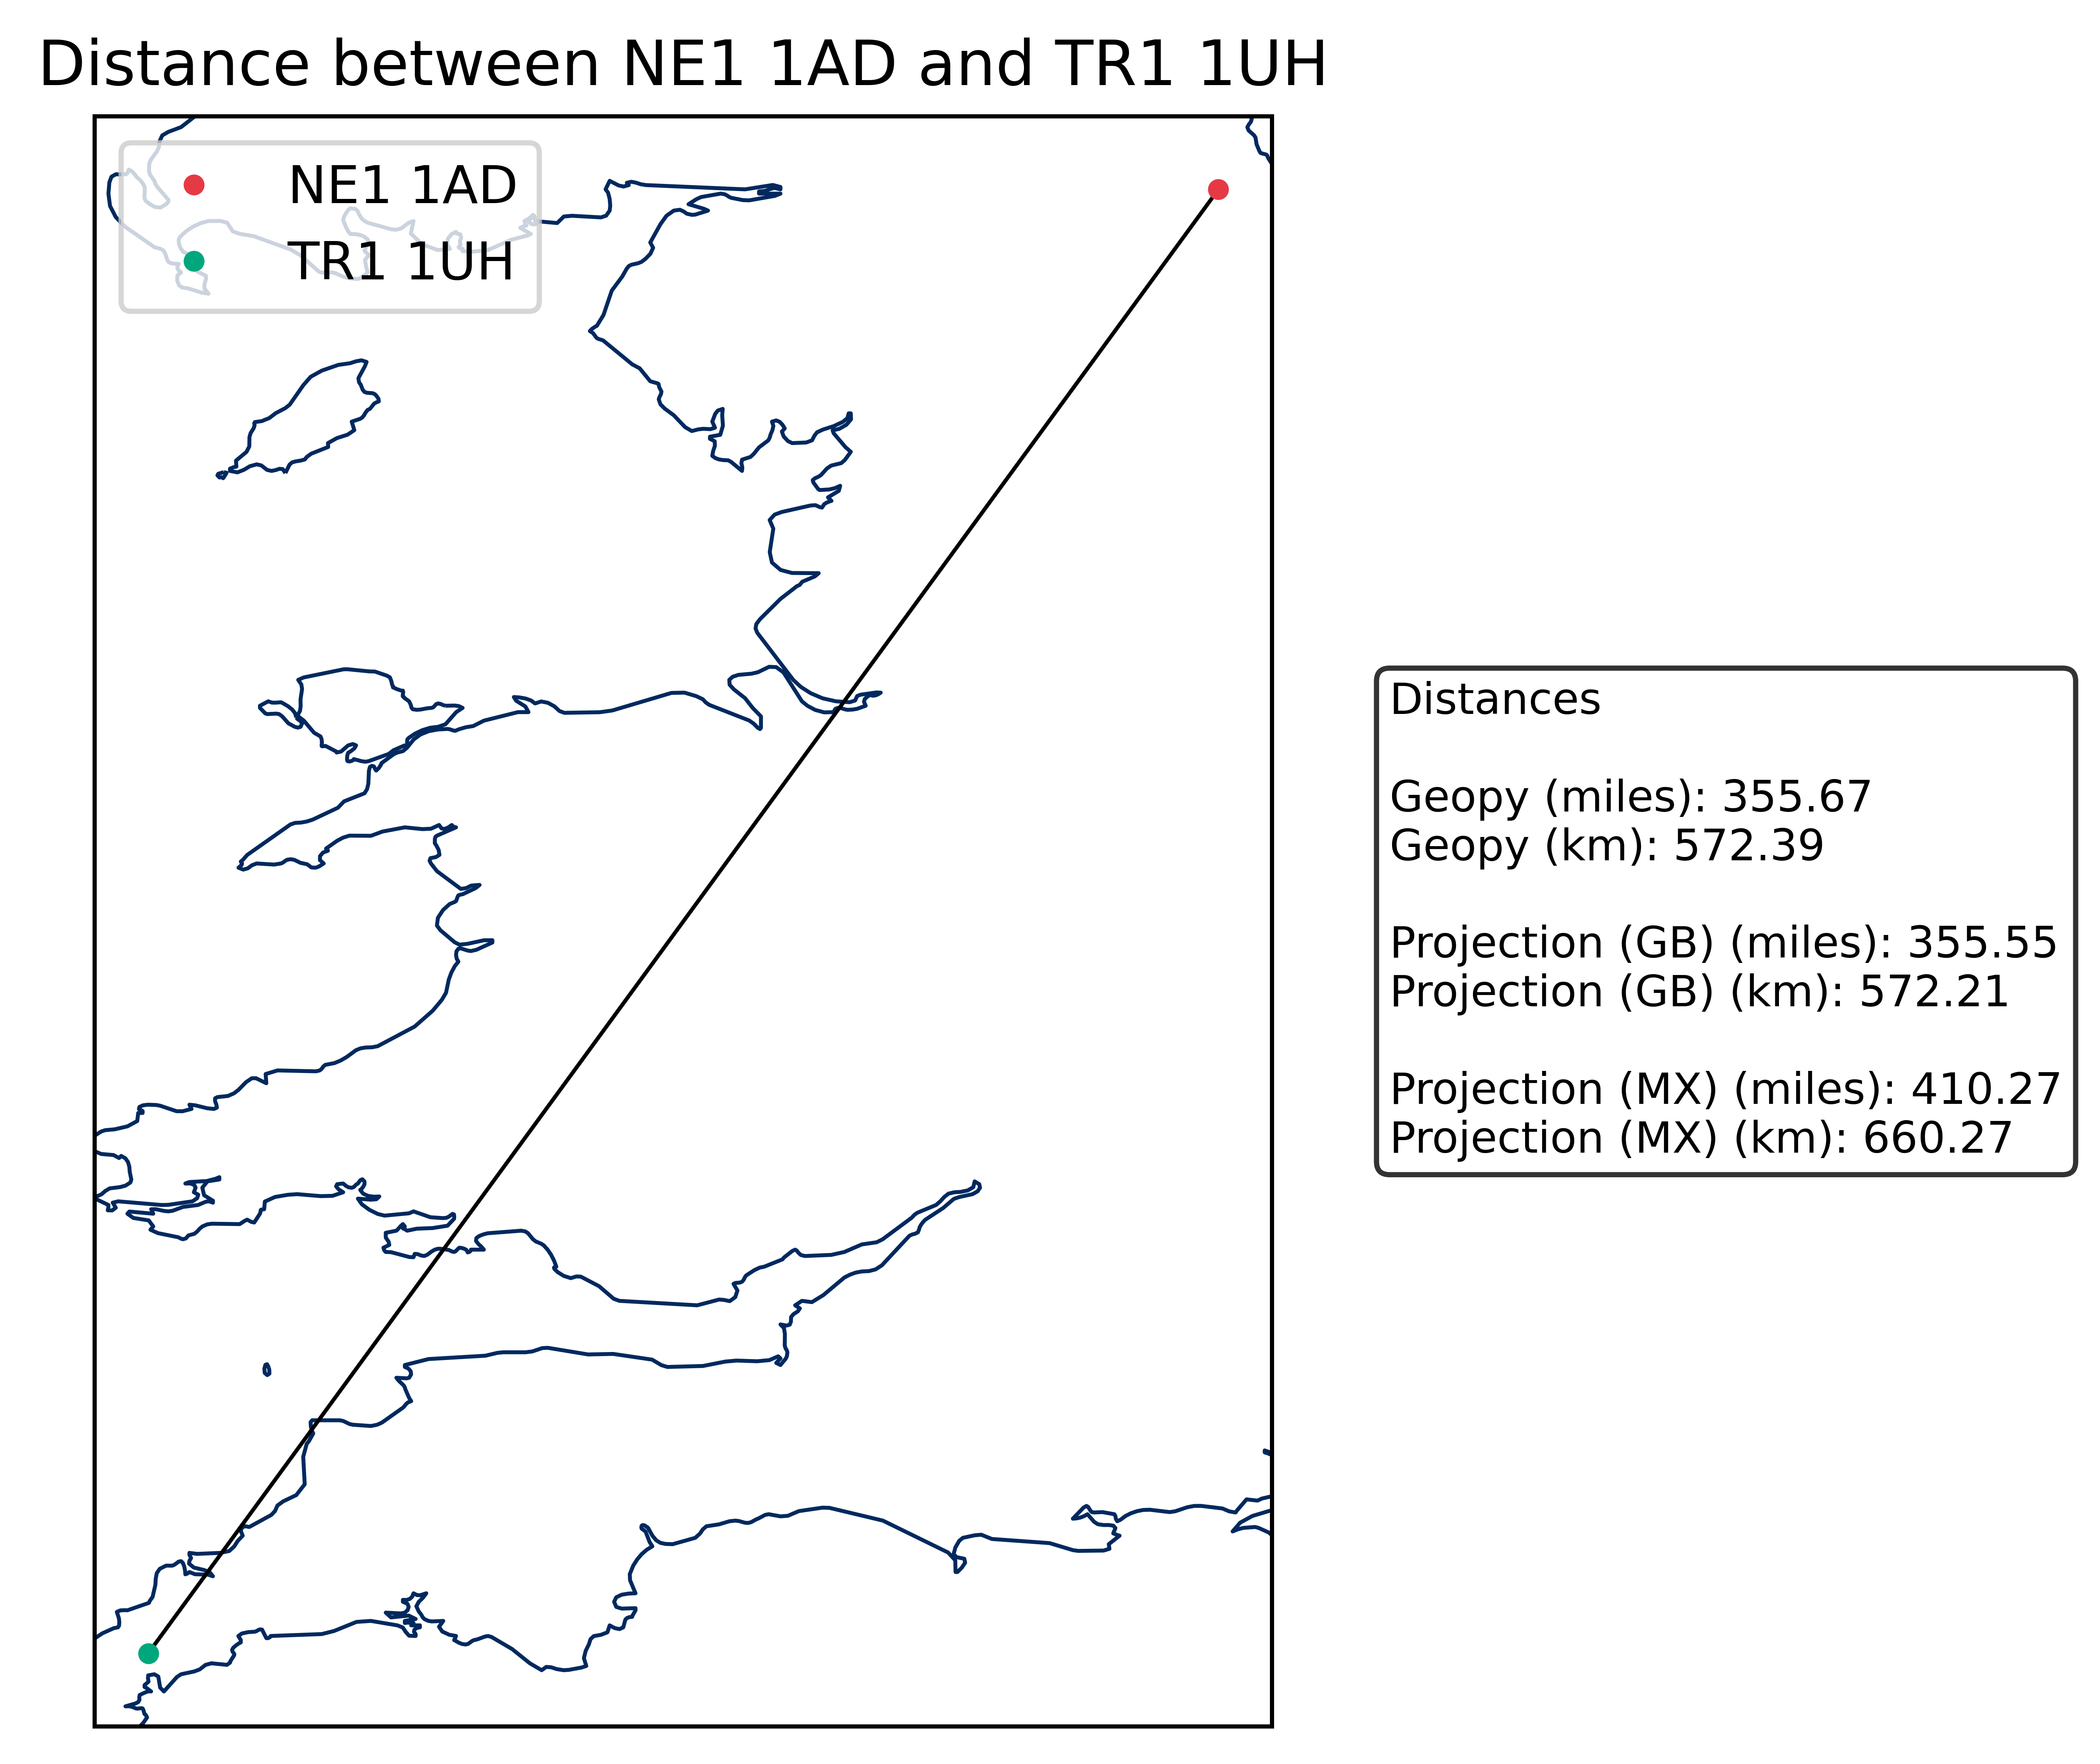

In [16]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, dpi=900)

if zip_code1 in coordinates_dict and zip_code2 in coordinates_dict:
    coord1 = coordinates_dict[zip_code1]
    coord2 = coordinates_dict[zip_code2]

    distance_geopy = calculate_distance_geopy(coord1[::-1], coord2[::-1])
    distance_geopy_miles, distance_geopy_km = distance_geopy

    projection_1 = Proj('EPSG:27700')
    distance_projection_1 = calculate_distance_projection(coord1, coord2, projection_1)
    distance_projection_1_miles, distance_projection_1_km = distance_projection_1
    
    projection_2 = Proj('EPSG:6362')
    distance_projection_2 = calculate_distance_projection(coord1, coord2, projection_2)
    distance_projection_2_miles, distance_projection_2_km = distance_projection_2

    point1, point2 = plot_map(ax, coord1, coord2, zip_code1, zip_code2, None)

    # Set the title of the plot as the method name
    ax.set_title(f'Distance between {zip_code1} and {zip_code2}')

    # Add legend
    ax.legend()
    
    # Your existing code for legend_distances_text
    legend_distances_text = f'Distances\n\nGeopy (miles): {distance_geopy_miles:.2f}\nGeopy (km): {distance_geopy_km:.2f}\n\nProjection (GB) (miles): {distance_projection_1_miles:.2f}\nProjection (GB) (km): {distance_projection_1_km:.2f}\n\nProjection (MX) (miles): {distance_projection_2_miles:.2f}\nProjection (MX) (km): {distance_projection_2_km:.2f}'
    
    fig.text(1.1, 0.5, legend_distances_text, transform=ax.transAxes, fontsize='small', va='center', ha='left', bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.3'))
    
plt.tight_layout()
plt.show()